In [1]:
instroom2018 <- read.table("instroom_2018.csv", header = TRUE, sep = ";")

In [2]:
library(tidyverse)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.1       ✔ purrr   0.3.2  
✔ tibble  2.1.1       ✔ dplyr   0.8.0.1
✔ tidyr   0.8.3       ✔ stringr 1.4.0  
✔ readr   1.3.1       ✔ forcats 0.4.0  
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [4]:
names(instroom2018) <- c("Jaarmaandnummerinstroomdatum","Aantalzaken","EersteAsielaanvraagindicatiezaak","Jaarstanddatum","Jaarinstroomdatum","Werksoortzaak","Gevraagdekwalificatiezaak","Geleverdekwalificatiezaak","Zaakdefinitiefindicatiezaak","Afdoeningswijzezaakdefinitief","Nationaliteitlangeomschrijvingsubjectinstroomdatum","Nationaliteitlangeomschrijvingsubjectuitstroomdatum")

In [5]:
instroom2018$Jaarmaandnummerinstroomdatum <- as.factor(instroom2018$Jaarmaandnummerinstroomdatum)

In [8]:
str(instroom2018)

'data.frame':	534 obs. of  12 variables:
 $ Jaarmaandnummerinstroomdatum                       : Factor w/ 12 levels "201801","201802",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Aantalzaken                                        : num  97 1 12 1 252 1 2 37 44 499 ...
 $ EersteAsielaanvraagindicatiezaak                   : Factor w/ 1 level "J": 1 1 1 1 1 1 1 1 1 1 ...
 $ Jaarstanddatum                                     : int  2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 ...
 $ Jaarinstroomdatum                                  : int  2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 ...
 $ Werksoortzaak                                      : Factor w/ 3 levels "Asiel AMV PIVA",..: 3 3 1 3 3 3 3 3 1 3 ...
 $ Gevraagdekwalificatiezaak                          : Factor w/ 5 levels "493 Asiel voor bepaalde tijd",..: 1 1 1 3 1 1 5 4 1 1 ...
 $ Geleverdekwalificatiezaak                          : Factor w/ 4 levels "334 Gezinsleven cf 8 EVRM",..: 4 4 4 4 2 2 4 4 2 4 ...
 $ Zaakdefinitiefindicatie

In [11]:
DefInstroom2018 <- filter(instroom2018, Zaakdefinitiefindicatiezaak == "J")

In [59]:
unique(DefInstroom2018$Afdoeningswijzezaakdefinitief)

[1] Ongegrond                  Intrekking door klant     
[3] Inwilliging                Niet ontvankelijk         
[5] Kennelijk ongegrond        Buiten behandeling stellen
[7] Niet in behandeling nemen  Overlijden                
9 Levels: Buiten behandeling stellen Intrekking door klant ... Overlijden

In [29]:
str(DefInstroom2018)

'data.frame':	427 obs. of  12 variables:
 $ Jaarmaandnummerinstroomdatum                       : Factor w/ 12 levels "201801","201802",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Aantalzaken                                        : num  97 1 1 252 1 2 37 44 499 31 ...
 $ EersteAsielaanvraagindicatiezaak                   : Factor w/ 1 level "J": 1 1 1 1 1 1 1 1 1 1 ...
 $ Jaarstanddatum                                     : int  2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 ...
 $ Jaarinstroomdatum                                  : int  2018 2018 2018 2018 2018 2018 2018 2018 2018 2018 ...
 $ Werksoortzaak                                      : Factor w/ 3 levels "Asiel AMV PIVA",..: 3 3 3 3 3 3 3 1 3 2 ...
 $ Gevraagdekwalificatiezaak                          : Factor w/ 5 levels "493 Asiel voor bepaalde tijd",..: 1 1 3 1 1 5 4 1 1 1 ...
 $ Geleverdekwalificatiezaak                          : Factor w/ 4 levels "334 Gezinsleven cf 8 EVRM",..: 4 4 4 2 2 4 4 2 4 2 ...
 $ Zaakdefinitiefindicatie

In [13]:
DefInstroom2018$Zaakdefinitiefindicatiezaak <- droplevels(DefInstroom2018$Zaakdefinitiefindicatiezaak)

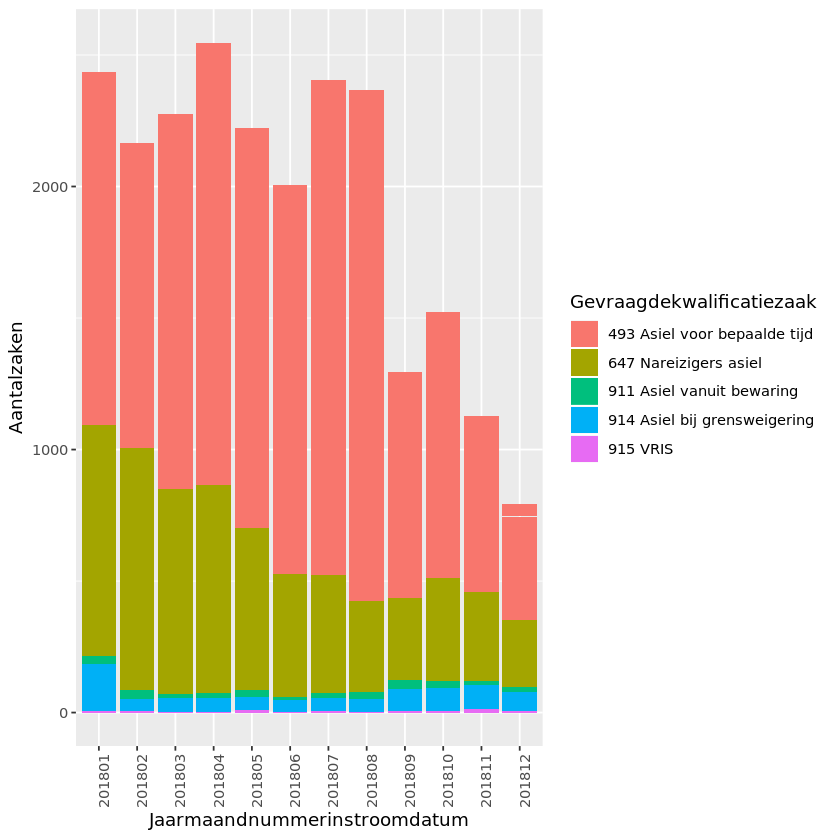

In [7]:
ggplot(instroom2018, aes(x=Jaarmaandnummerinstroomdatum, y = Aantalzaken, fill= Gevraagdekwalificatiezaak)) + # Werksoortzaak Gevraagdekwalificatiezaak
    geom_col() +
    #scale_y_log10() +
    #ylab("proportion") +
    #facet_wrap(~Gevraagdekwalificatiezaak) +
    theme(axis.text.x=element_text(angle=90))


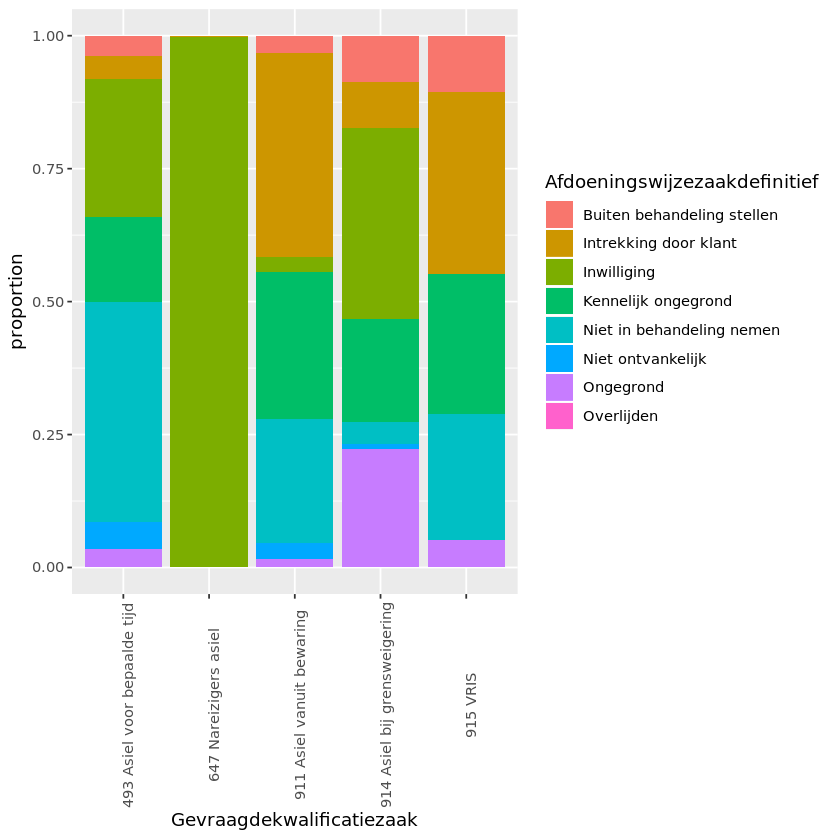

In [17]:
ggplot(DefInstroom2018, aes(x=Gevraagdekwalificatiezaak, y = Aantalzaken, fill= Afdoeningswijzezaakdefinitief)) + # Werksoortzaak Gevraagdekwalificatiezaak
    geom_col(position = "fill") +
    #scale_y_log10() +
    ylab("proportion") +
    #facet_wrap(~Gevraagdekwalificatiezaak) +
    theme(axis.text.x=element_text(angle=90))

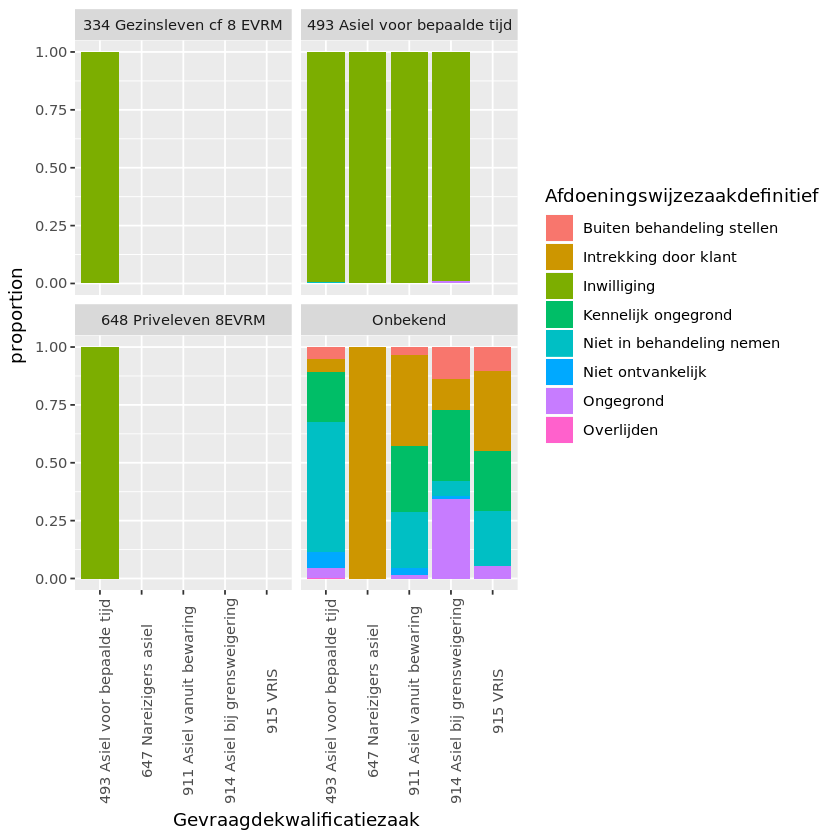

In [18]:
ggplot(DefInstroom2018, aes(x=Gevraagdekwalificatiezaak, y = Aantalzaken, fill= Afdoeningswijzezaakdefinitief)) + # Werksoortzaak Gevraagdekwalificatiezaak
    geom_col(position = "fill") +
    ylab("proportion") +
    facet_wrap(~Geleverdekwalificatiezaak) +
    theme(axis.text.x=element_text(angle=90))
